In [26]:
import nsfg
import thinkstats2

In [28]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [29]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [31]:
preg = nsfg.ReadFemPreg()

In [32]:
live = preg[preg.outcome == 1]

In [11]:
import thinkstats2
import thinkplot
hist = thinkstats2.Hist([1, 2, 2, 3,4,1,5, 5])

In [14]:
n = hist.Total()
d = {}
for x, freq in hist.Items():
    print(x,freq)
    d[x] = freq / n

1 2
2 2
3 1
4 1
5 2


In [13]:
d

{1: 0.25, 2: 0.25, 3: 0.125, 4: 0.125, 5: 0.25}

In [15]:
import thinkstats2
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [19]:
# pmf.Prob(2)
# or 
pmf[2]

0.4

In [21]:
# increment the prob
print('Increment the prob of 2:',pmf.Incr(2, 0.2))
print('after increment prob of 2:',pmf.Prob(2))
# Or mult
print('Multiply the prob of 2:',pmf.Mult(2, 0.5))
print('after multiplication of prob 2:',pmf.Prob(2))
# if you modify the pmf it won't be normalised any more 
print('Checking the normalization:',pmf.Total())
# to renormalize
print('re-normalization:',pmf.Normalize())
print('Cheking the normalization',pmf.Total())

Increment the prob of 2: None
after increment prob of 2: 0.6000000000000001
Multiply the prob of 2: None
after multiplication of prob 2: 0.30000000000000004
Checking the normalization: 0.8999999999999999
re-normalization: 0.8999999999999999
Cheking the normalization 1.0


### Plotting PMFs

In [53]:
preg

SyntaxError: invalid syntax (1000053011.py, line 1)

In [54]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
first = live[live.birthord == 1]
other = live[live.birthord != 1]
import thinkstats2

first_lengths = first.prglngth
other_lengths = other.prglngth

first_pmf = thinkstats2.Pmf(first_lengths, label='first')
other_pmf = thinkstats2.Pmf(other_lengths, label='other')


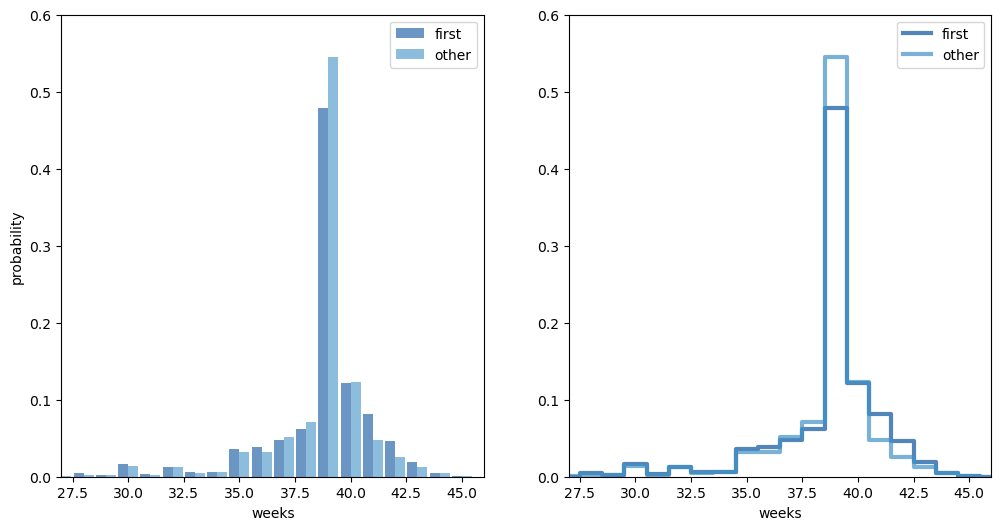

<Figure size 800x600 with 0 Axes>

In [55]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=0.45)
thinkplot.Hist(other_pmf, align='left', width=0.45)
thinkplot.Config(xlabel='weeks',
ylabel='probability',
axis=[27, 46, 0, 0.6])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks',
axis=[27, 46, 0, 0.6])
# PrePlot takes optional parameters rows and cols to make a grid of figures,
# in this case one row of two figures. The first figure (on the left) displays the
# Pmfs using thinkplot.Hist, as we have seen before.
# The second call to PrePlot resets the color generator. Then SubPlot
# switches to the second figure (on the right) and displays the Pmfs using
# thinkplot.Pmfs. I used the axis option to ensure that the two figures are
# on the same axes, which is generally a good idea if you intend to compare
# two figures.

### Other Visualisations

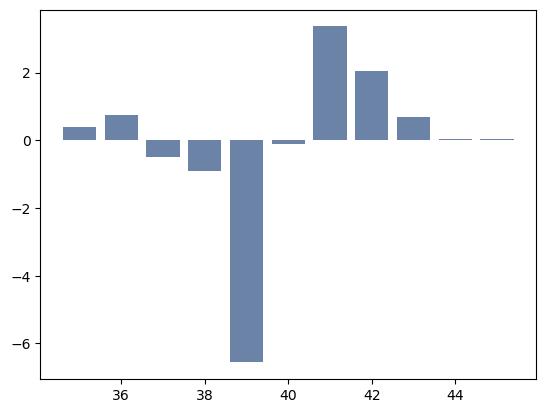

In [58]:
# checking the nsfg near "mode"
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
thinkplot.Bar(weeks, diffs)